# Result 1: sample level stats

In [1]:
# Does adapter failure have a length bias???
%matplotlib inline
from core import *
import pickle

samples = analysis_set["main"]
read_stats =  pickle.load( open( "pickles/main_20_100.pckl", "rb" ) )

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# guppy alone
for sample in samples:
    acc = np.median(read_stats[sample]["acc"])
    n_reads = read_stats[sample]["metrics"].shape[0]
    mis, ins, delete = np.median(read_stats[sample]["metrics"], axis = 0)
    qscore = np.median(read_stats[sample]["qscores"][:, 0])
    length = np.median(read_stats[sample]["aligned_read_length"])
    print("%s & %d & %.1f & %d & %.3f & %.3f & %.3f & %.3f & \\\\ [3ex] \\hline" % (sample.replace("_IVT", " (IVT)"), n_reads, qscore, length, acc, mis, ins, delete))

Human & 1483755 & 10.2 & 876 & 0.901 & 0.027 & 0.026 & 0.045 & \\ [3ex] \hline
Human (IVT) & 2015950 & 10.7 & 486 & 0.916 & 0.022 & 0.022 & 0.039 & \\ [3ex] \hline
Mouse & 181977 & 9.6 & 616 & 0.878 & 0.036 & 0.025 & 0.059 & \\ [3ex] \hline
Zebrafish & 553604 & 9.6 & 839 & 0.867 & 0.037 & 0.020 & 0.073 & \\ [3ex] \hline
C. elegans & 227372 & 11.0 & 688 & 0.915 & 0.020 & 0.019 & 0.044 & \\ [3ex] \hline
Arabidopsis & 1010943 & 10.7 & 878 & 0.911 & 0.022 & 0.021 & 0.045 & \\ [3ex] \hline
H. volcanii & 22315 & 9.9 & 505 & 0.905 & 0.028 & 0.022 & 0.043 & \\ [3ex] \hline
E. coli & 198448 & 9.3 & 662 & 0.876 & 0.040 & 0.032 & 0.049 & \\ [3ex] \hline
shortRNAs (IVT) & 45028 & 8.5 & 160 & 0.899 & 0.026 & 0.019 & 0.051 & \\ [3ex] \hline
Yeast & 324889 & 9.4 & 314 & 0.898 & 0.024 & 0.024 & 0.050 & \\ [3ex] \hline
SARS2 & 575673 & 11.0 & 2078 & 0.914 & 0.022 & 0.020 & 0.044 & \\ [3ex] \hline
SARS2 (IVT) & 2316635 & 10.5 & 1572 & 0.908 & 0.024 & 0.023 & 0.044 & \\ [3ex] \hline


In [3]:
colors = list(sns.color_palette(palette=None, n_colors=10, desat=None, as_cmap=False))
colors.append( (1.0, 0.8509803921568627, 0.1843137254901961))
colors.append((0.6509803921568628, 0.8470588235294118, 0.32941176470588235))
sns.color_palette(palette=colors)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)]

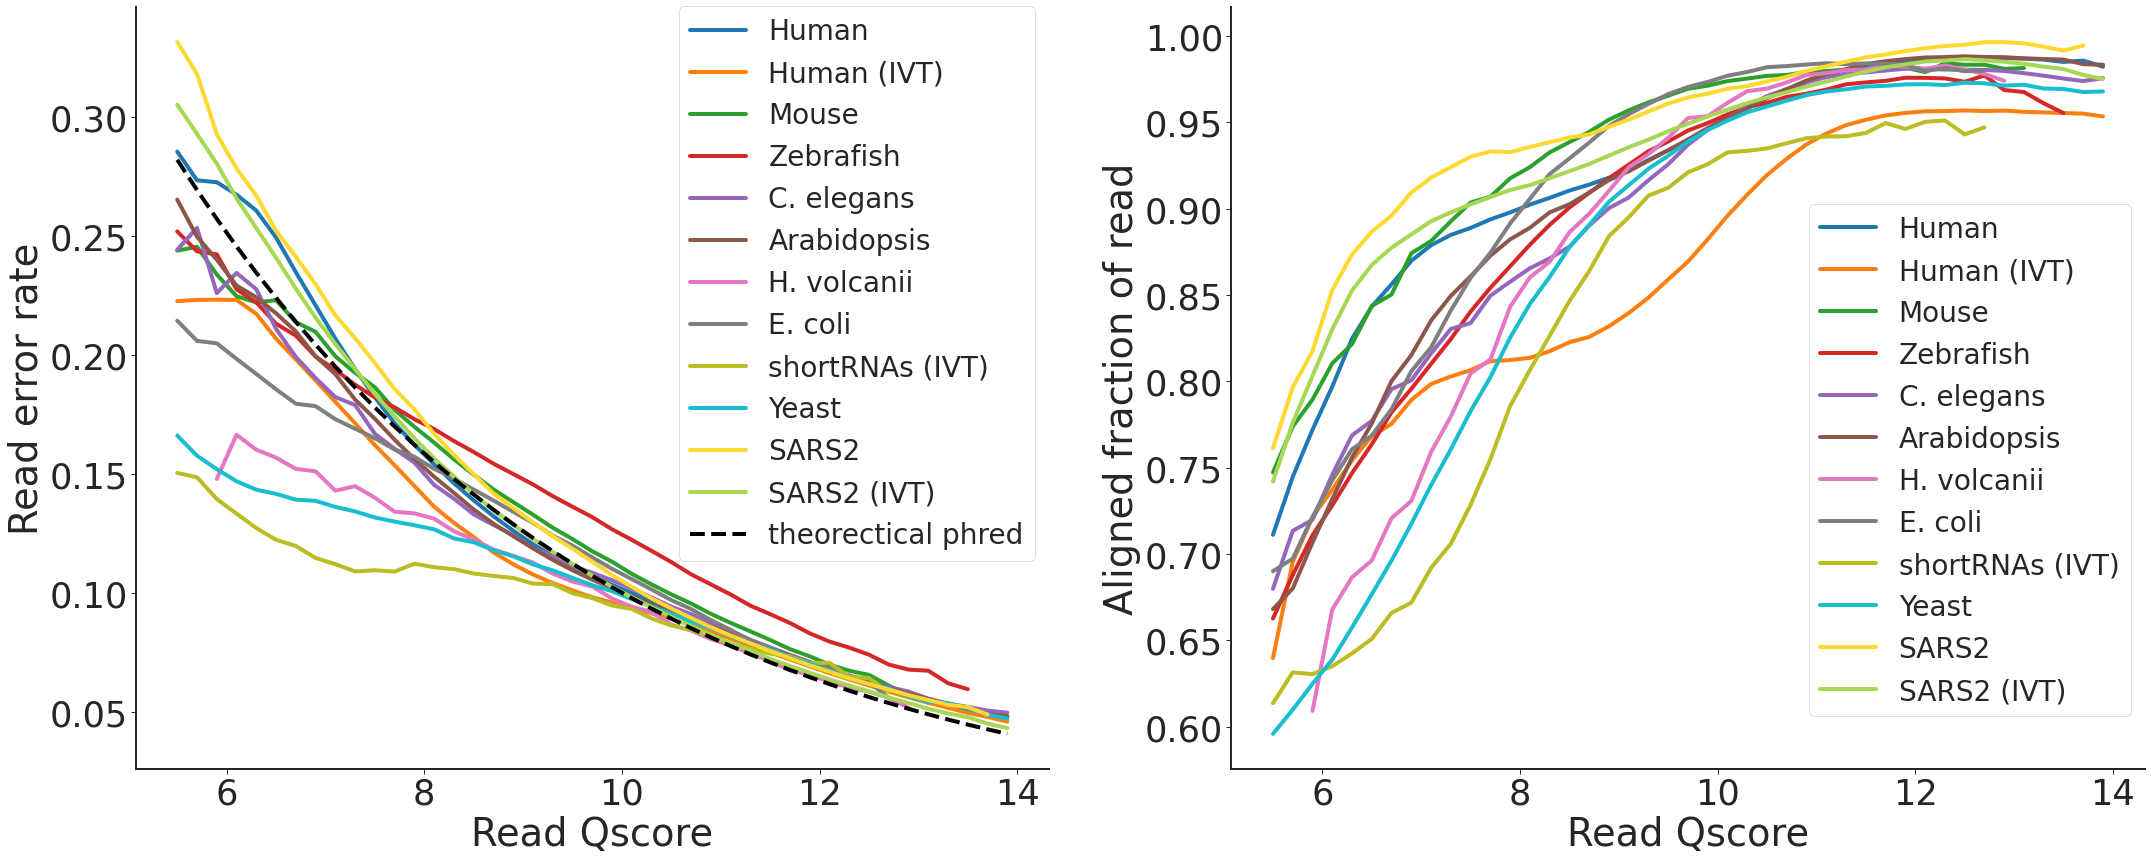

In [8]:
def plot_qscore_acc(read_stats, col, lw, ax = None):
    bin_size = 0.2
    x = np.arange(5.5, 14, bin_size)
    phred = np.power(10, -x/10)
    
    sns.set_style("ticks")
    sns.set_context("paper", font_scale = 2 if ax is None else 4)
    sns.set_palette(colors)
    for sample in samples:
        qscores = read_stats[sample]["qscores"][:, col]
        sample_x, y = [], []
        for i in range(len(x)):
            indexes = np.where((qscores > x[i]) & (qscores < x[i] + bin_size))
            if indexes[0].shape[0] > 50:
                errors = np.sum(read_stats[sample]["metrics"][indexes], axis = 1)
                mean_error = np.mean(errors)
                sample_x.append(x[i])
                y.append(mean_error)
        if "IVT" in sample:
            sample = sample.split("_IVT")[0] + " (IVT)"
        if ax is None:
            sns.lineplot(x = sample_x, y = y, lw=lw[0], label = sample)
        else:
            sns.lineplot(x = sample_x, y = y, lw=lw[0], label = sample, ax = ax)
    if ax is None:
        sns.lineplot(x = x, y = phred, lw=lw[1], linestyle = 'dashed', color= 'black', label =  "theorectical phred")
    else:
        sns.lineplot(x = x, y = phred, lw=lw[1], linestyle = 'dashed', color= 'black', label =  "theorectical phred", ax = ax)
    sns.despine()

fig, axes = plt.subplots(1, 2, figsize = (36, 14))

plot_qscore_acc(read_stats, 0, lw = (4, 4), ax = axes[0])
axes[0].set(xlabel="Read Qscore", ylabel="Read error rate")
axes[0].legend(fontsize = 28, loc = 'upper right', bbox_to_anchor = (1, 1.02), fancybox = True, ncol = 1)
axes[0].spines['left'].set_linewidth(2), axes[0].spines['bottom'].set_linewidth(2)

bin_size = 0.2
x = np.arange(5.5, 14, bin_size)
for sample in samples:
    qscores = read_stats[sample]["qscores"][:, 0]
    sample_x, y = [], []
    for i in range(len(x)):
        indexes = np.where((qscores > x[i]) & (qscores < x[i] + bin_size))
        if indexes[0].shape[0] > 50:
            align_ratio = np.mean(read_stats[sample]["align_ratio"][indexes])
            sample_x.append(x[i])
            y.append(align_ratio)
    if "IVT" in sample:
            sample = sample.split("_IVT")[0] + " (IVT)"
    sns.lineplot(x = sample_x, y = y, lw=4, label = sample, ax = axes[1])

axes[1].set(xlabel="Read Qscore", ylabel="Aligned fraction of read")
axes[1].legend(fontsize =28, loc = 'lower right', bbox_to_anchor = (1, 0.05), fancybox = True, ncol = 1)
axes[1].spines['left'].set_linewidth(2), axes[1].spines['bottom'].set_linewidth(2)

# plt.savefig("images/qscore/readq2errornalign", bbox_inches = "tight")
plt.show()


Human -0.3758952202574947 1.092730824610592
Human_IVT -0.2542673029941467 1.0787511803942147
Mouse -0.33689381673226954 1.0844021750576223
Yeast -0.1595605428678344 1.0688144069013805
C. elegans -0.23771589739652202 1.0788522682271844
E. coli -0.2864671211597073 1.082121560243382
SARS2 -0.40804557374556594 1.0968218359658235
SARS2_IVT -0.36436179290426274 1.0914887297725369
Arabidopsis -0.2851324612379047 1.0851856112540776
shortRNAs_IVT -0.07968478653174538 1.0580278178132527
Zebrafish -0.34885655505870033 1.0913369171259761
P. furiosus -0.26978582570567206 1.0785875433923662


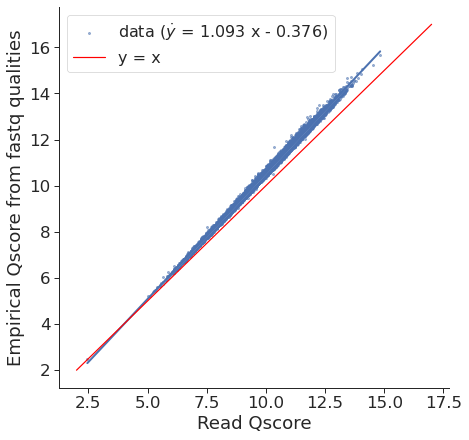

In [37]:
for sample in samples:
    const, beta = read_stats[sample]["fitted_params"]
    print(sample, const, beta)

sns.set(rc = {'figure.figsize': (7, 7)})   
sns.set_context("paper", font_scale = 1.9)
sns.set_style("ticks")

subsample = 200000
sample = "Human"
const, beta = read_stats[sample]["fitted_params"]
label = 'data ('+ r'$\.y$'  + ' = ' + str(np.round(beta,3)) + ' x' + " - " + str(np.round(-const,3)) + ")"
sns.regplot(x = read_stats[sample]["read_q"][:subsample], y = read_stats[sample]["empirical_q"][:subsample], 
            label=label, line_kws={"linewidth": 2, "color":'b'}, scatter_kws={"s":4, "alpha":0.5})
sns.despine()
plt.plot(np.arange(2, 18), np.arange(2, 18), color = "red", label='y = x')
plt.xlabel("Read Qscore"), plt.ylabel("Empirical Qscore from fastq qualities")
plt.legend(fontsize = 16, fancybox = True)
# plt.savefig("images/qscore/empirical", bbox_inches = "tight")
plt.show()